# Biology Text Generator Final Project

## By Mandy Liu, Mt. San Antonio College, CISB63 Fall 2023

<img src ="NLP-banner.jpg" style="width:900px;heightt:40px" align="left"/>

## Introduction

The goals of this project are to develop a text generator for a biology textbook and visualize Word2Vec embeddings using UMAP. Advanced natural language processing (NLP) techniques, such as pre-trained word embeddings (i.e., Word2Vec) to represent words as dense vectors and Recurrent Neural Networks (RNNs), specifically Long Short-Term Memory (LSTM) networks, were used. The primary focus is to create a tool that is helpful and suitable for academic purposes. This project holds significant potential for aiding educators, students, and researchers in generating supplemental materials or enhancing the learning experience in the field of biology.

## Summary and Conclusion

The text generator was created using the RNN with LSTM layer to generate text. The model was trained using a biology textbook which includes 488 pages. The accuracy reached 82.08% with a loss of 0.7582 when trained with epochs=30. Several things can help improve the model. One can adjust the embedding dimension to a higher-dimensional embedding space to capture more nuanced relationships between words. Stacking multiple LSTM layers can help the model learn hierarchical representations and adjusting the LSTM units to find an optimal balance between model complexity and performance. Increase the number of units in the Dense layer to allow the model to learn more complex patterns can also be done. Experiment with smaller learning rate might help the model converge (when the model's parameters (weights and biases) reach stable values) more effectively. If the model hasn't converged, train for more epochs. However, caution needs to be taken to prevent overfitting. Splitting the data into training and validation sets to monitor the model's performance on unseen data can also help prevent overfitting. Adding dropout layers between LSTM layers and/or before the Dense layer can help prevent overfitting. Using smaller batch sizes during training may help the model generalize better. Many adjustments can be made to further improve the text genenrator, including using a larger size textbook with more information. This smaller size textbook and the parameters chosen were due to limited computer resources.

Frequency Distribution plot of words from top sentences was generated to show how often different words appear in the most significant sentences in the textbook. A word cloud was generated to provide a quick and visually appealing way to identify words in the textbook. Named Entity Recognition (NER) and spaCy (Spacey) were used to identify and classify entities like persons, organizations, and locations in the text. A Word2Vec model was used to find similar words based on the similarity of their vector representations in the embedding space. 


A Word2Vec model was trained to visualize Word2Vec embeddings using UMAP from Gensim library. This Word2Vec model was trained on preprocessed text data, utilizing a Skip-Gram approach with negative sampling. Skip-Gram focuses on predicting the words surrounding a target word. This approach is effective in capturing the contextual information of words within a given context window. Negative sampling is a technique used to make the training process more efficient. Instead of adjusting all weights for each training example (which involves updating a large portion of the neural network), negative sampling randomly selects a small number of "negative" examples (words not in the context) for each target word. This reduces the computational complexity and speeds up training. The Word2Vec model employed a vector size of 200, a window size of 15, and a minimum word count of 5, among other parameters. Following training, the learned word embeddings were subjected to dimensionality reduction using UMAP, and the resulting representations were clustered using KMeans. 

The UMAP visualization of Word2Vec embeddings represents words as dots in a two-dimensional space, with the position of each dot reflecting the similarity of words in the high-dimensional embedding space. Proximity between dots indicates semantic similarity, clusters represent groups of words with shared meanings or contexts, and distances signify dissimilarity. Isolated points may correspond to less common or context-specific words. The Word2Vec embeddings are clustered using the KMeans algorithm based on their UMAP reduced coordinates. For each cluster, the centroid (average position) of the data points in the UMAP space is calculated. The word that is nearest to each centroid in the original Word2Vec embedding space is identified. This is done by finding the data point in the original UMAP DataFrame whose UMAP coordinates are closest to the centroid. The model provides a structured and semantically meaningful representation of words based on their contextual usage in the original text data.

## Reference Links

My github: https://github.com/mandyliu-1/CISB63<br>
Textbook: https://dept.clcillinois.edu/biodv/PrinciplesOfBiology.pdf<br>
Banner image: https://www.aismartz.com/NLP.html

## Import Libraries

In [37]:
import nltk                                                      # NLTK
from nltk.corpus import stopwords                                # Stopwords
from nltk.tokenize import sent_tokenize, word_tokenize           # Tokenize
from nltk.probability import FreqDist                            # Frequency distribution analysis

from textblob import TextBlob                                    # TextBlob                 

from sklearn.feature_extraction.text import TfidfVectorizer      # TF-IDF vectorizer
from sklearn.feature_extraction.text import CountVectorizer      # Count vectorizer
from sklearn.manifold import TSNE                                # t-Distributed Stochastic Neighbor Embedding
from sklearn.preprocessing import LabelEncoder                   # Encode categorical labels as numerical values
from sklearn.cluster import KMeans                               #KMeans

import spacy                                                     # SpaCy
from spacy import displacy                                       # Displacy

import seaborn as sns                                            # Seaborn
import pandas as pd                                              # Pandas
import numpy as np                                               # NumPy

import re                                                        # Regular expressions

import PyPDF2                                                    # Read PDF files

import string                                                    # String manipulation

import matplotlib.pyplot as plt                                  # Matplotlib
%matplotlib inline

from wordcloud import WordCloud                                  # WordCloud

import gensim                                                    # Gensim
from gensim.models import Word2Vec                               # Word2Vec

from PIL import Image                                            # Image module

import tensorflow as tf                                          # Tensorflow and Keras
from tensorflow.keras import preprocessing , utils
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import Input, Model
from keras.activations import softmax
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.optimizers import Adam                                # Adam optimizer

import umap                                                      # UMAP


import random                                                    # random

import os                                                        # os for interacting with the operating system

## Read the File

In [2]:
# Open the PDF file
with open('/Users/mmliu/Desktop/CISB63/CISB63_Final_MandyLiu/PrinciplesOfBiology.pdf', 'rb') as pdf_file:
    # Create a PDF reader object
    pdf_reader = PyPDF2.PdfReader(pdf_file)

    # Initialize a variable to store the text
    text = ""

    # Iterate through each page and extract text
    for page in pdf_reader.pages:
        text += page.extract_text()

# Print or use the extracted text
print(text)

 
ii  Return to Table of Contents  Principles of Biology – An Introduction to Biological Concepts has been modified from several OpenStax textbooks 
including  Concepts of Biology, Biology 2E, Microbiology and Anatomy and Physiology . These textbooks have been cited 
and attributed below. Each textbook can be accessed  for free in its original form by clicking on the links  included with 
each book citation .  The OpenStax textbooks are licensed under  Creative Commons Attribution License 4.0.   
Concepts of Biology OpenStax  
o Authors: Samantha Fowler, Rebecca Roush, James Wise  
o Publisher/website: OpenStax  
o Book title: Concepts of Biology  
o Publication date: Apr 25, 2013  
o Location: Houston, Texas  
o Book URL:  https://openstax.org/books/c oncepts-biology/pages/1 -introduction  
o Section URL:  https://openstax.org/books/concepts -biology/pages/1 -introduction  
© Jan 12, 2021 OpenStax. Textbook content produced by Ope nStax is licensed under a Creative Commons Attribution

## Text Generator using Recurrent Neural Network (RNN) with LSTM layer

### Preprocess the text

In [3]:
# Get the number of pages
num_pages = len(pdf_reader.pages)

# Print the number of pages
print(f"Number of pages in the PDF: {num_pages}")

Number of pages in the PDF: 448


In [4]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

In [5]:
# Create input sequences and corresponding labels
input_sequences = []

# Iterate over each line in the text
for line in text.split('\n'):
    # Convert the line into a sequence of tokens using the tokenizer
    token_list = tokenizer.texts_to_sequences([line])[0]
    
    # Create n-gram sequences from the token list
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [6]:
# Prepares the input data for training a neural network, ensuring that all input sequences have the same length 
# and are formatted appropriately

# Calculate the maximum sequence length among all input sequences
max_sequence_length = max([len(x) for x in input_sequences])

# Pad input sequences to have a uniform length using the maximum sequence length
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

# Separate input sequences into features (X) and labels (y)
X, y = input_sequences[:, :-1], input_sequences[:, -1]

# Convert labels to one-hot encoding for categorical classification
y = tf.keras.utils.to_categorical(y, num_classes=total_words)


### Build the LSTM model

In [7]:
# Build the LSTM model
model = Sequential()

# Embedding layer to convert input words to dense vectors
# total_words: This is the total number of unique words in the vocabulary
# Each word will be represented by a vector of length 100
model.add(Embedding(total_words, 100, input_length=max_sequence_length-1))


# LSTM layer with 150 units to capture context and patterns in the sequence
model.add(LSTM(150))

# Dense layer for output with 'softmax' activation for multi-class classification (text generation)
model.add(Dense(total_words, activation='softmax'))

# Create an instance of the Adam optimizer with a learning rate of 0.001
adam_optimizer = Adam(learning_rate=0.001)

# Compile the model with categorical crossentropy loss and the Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

# Display a summary of the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 37, 100)           869700    
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 8697)              1313247   
                                                                 
Total params: 2333547 (8.90 MB)
Trainable params: 2333547 (8.90 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Train the model and store the history

In [8]:
history = model.fit(X, y, epochs=30, verbose=1)

Epoch 1/30
3693/3693 [==============================] - 135s 36ms/step - loss: 6.1953 - accuracy: 0.1254
Epoch 2/30
3693/3693 [==============================] - 131s 35ms/step - loss: 5.1837 - accuracy: 0.2091
Epoch 3/30
3693/3693 [==============================] - 131s 36ms/step - loss: 4.6143 - accuracy: 0.2533
Epoch 4/30
3693/3693 [==============================] - 131s 36ms/step - loss: 4.1339 - accuracy: 0.2904
Epoch 5/30
3693/3693 [==============================] - 132s 36ms/step - loss: 3.7219 - accuracy: 0.3271
Epoch 6/30
3693/3693 [==============================] - 131s 35ms/step - loss: 3.3636 - accuracy: 0.3636
Epoch 7/30
3693/3693 [==============================] - 133s 36ms/step - loss: 3.0492 - accuracy: 0.4029
Epoch 8/30
3693/3693 [==============================] - 140s 38ms/step - loss: 2.7725 - accuracy: 0.4425
Epoch 9/30
3693/3693 [==============================] - 131s 36ms/step - loss: 2.5296 - accuracy: 0.4797
Epoch 10/30
3693/3693 [==============================] 

### Plot model loss and accuracy 

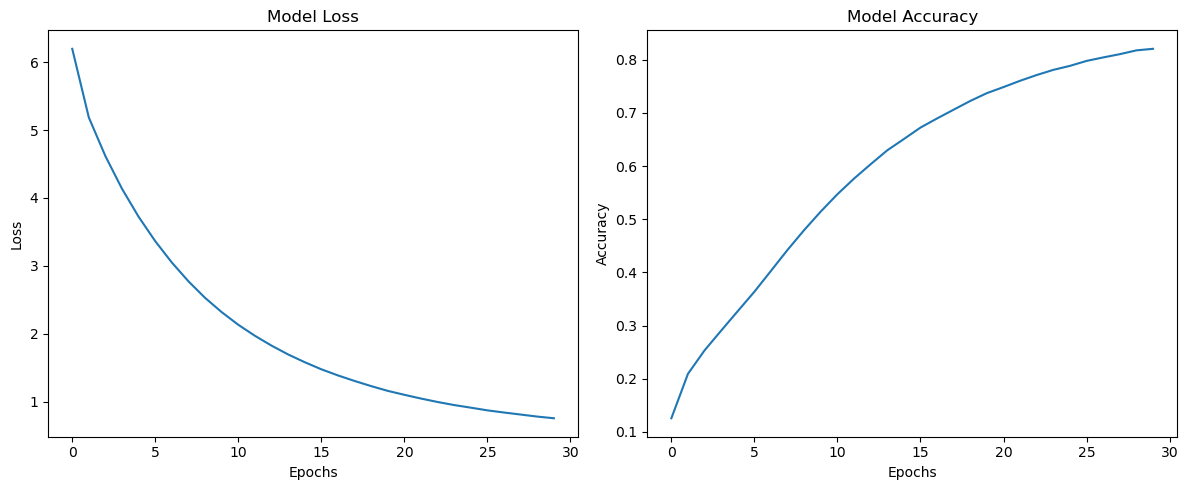

In [33]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the Loss
ax1.plot(history.history['loss'])
ax1.set_title('Model Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')

# Plotting the Accuracy
ax2.plot(history.history['accuracy'])
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')

# Adjust layout
plt.tight_layout()
plt.show()

### Function to generate text 

In [34]:
def generate_text(seed_text, next_words, model, max_sequence_length):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0] # tokenizing the seed text
        token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre') # padding
        
        #The model is used to predict the index of the next word in the sequence using the predict method. 
        predicted = np.argmax(model.predict(token_list, verbose=0)) 
        
        # The predicted index is then mapped back to the corresponding word using the word_index attribute 
        # of the tokenizer
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        
        # The predicted word is appended to the seed text, creating an updated seed for the next iteration.
        seed_text += " " + output_word
    return seed_text

### Generate text

In [36]:
generated_text = generate_text("genetics is ", 30, model, max_sequence_length)
print(generated_text)


genetics is  the study of heredity the ability to pass on traits from one generation to the next population mendel followed white or each individual is also likely to be have a


## Data Exploration and Visualization

### Tokenize the text into sentences

In [38]:
sentences = sent_tokenize(text)
print(sentences)

[' \nii  Return to Table of Contents  Principles of Biology – An Introduction to Biological Concepts has been modified from several OpenStax textbooks \nincluding  Concepts of Biology, Biology 2E, Microbiology and Anatomy and Physiology .', 'These textbooks have been cited \nand attributed below.', 'Each textbook can be accessed  for free in its original form by clicking on the links  included with \neach book citation .', 'The OpenStax textbooks are licensed under  Creative Commons Attribution License 4.0.', 'Concepts of Biology OpenStax  \no Authors: Samantha Fowler, Rebecca Roush, James Wise  \no Publisher/website: OpenStax  \no Book title: Concepts of Biology  \no Publication date: Apr 25, 2013  \no Location: Houston, Texas  \no Book URL:  https://openstax.org/books/c oncepts-biology/pages/1 -introduction  \no Section URL:  https://openstax.org/books/concepts -biology/pages/1 -introduction  \n© Jan 12, 2021 OpenStax.', 'Textbook content produced by Ope nStax is licensed under a Cre

### Split the text into words and count the number of words

In [39]:
words = text.split()
total_words = len(words)

# Print the total number of words
print(f"Total number of words: {total_words}")

# Print the total number of sentences
print(f"Total number of Sentences: ", len(sentences)) 

Total number of words: 125869
Total number of Sentences:  6338


### Remove punctuation and stopwords

In [40]:
nltk.download('punkt')  # Tokenizer models
nltk.download('stopwords')  # Stopwords
stop_words = set(stopwords.words('english'))
nltk.download('averaged_perceptron_tagger')  # Part-of-speech tagger


[nltk_data] Downloading package punkt to /Users/mmliu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mmliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mmliu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Convert words to lowercase, remove stop words and remove non-alphabetic characters and symbols

In [41]:
def preprocess_text(text):
    
    # tokenize the input text into words and assign it to words variable
    words = word_tokenize(text)
    
    # converts each word in the list to lowercase
    # checks whether a word consists of alpha numeric characters; remove non-alphabetic characters and symbols
    #words = [word.lower() for word in words if word.isalnum()]
    words = [word.lower() for word in words]
    
    # remove stop words
    words = [word for word in words if word not in stop_words]
    
    # join the preprocessed words back together into a single string with space separators
    return ' '.join(words)

print(preprocess_text(text))

ii return table contents principles biology – introduction biological concepts modified several openstax textbooks including concepts biology , biology 2e , microbiology anatomy physiology . textbooks cited attributed . textbook accessed free original form clicking links included book citation . openstax textbooks licensed creative commons attribution license 4.0 . concepts biology openstax authors : samantha fowler , rebecca roush , james wise publisher/website : openstax book title : concepts biology publication date : apr 25 , 2013 location : houston , texas book url : https : //openstax.org/books/c oncepts-biology/pages/1 -introduction section url : https : //openstax.org/books/concepts -biology/pages/1 -introduction © jan 12 , 2021 openstax . textbook content produced ope nstax licensed creative commons attribution license 4.0 license . openstax name , openstax logo , openstax book covers , openstax cnx name , openstax cnx logo subject creative commons license may reproduced witho

### Process a list of sentences and store the preprocessed versions of those sentences in a new list

In [42]:
preprocessed_sentences = []
for sentence in sentences:
    preprocessed_sentence = preprocess_text(sentence)
    preprocessed_sentences.append(preprocessed_sentence)

### Translate the preprocessed sentence to Chinese

In [43]:
# Create a TextBlob object with the text
blob = TextBlob(preprocessed_sentences[100])

# Translate the text to Chinese
translated_blob = blob.translate('en', 'zh-TW')

# Print the translated text
print(translated_blob)

發展也觀察到許多生物。


### Calculate the Term Frequency-Inverse Document Frequency (TF-IDF) scores

In [44]:
# Calculate the overall importance of each sentence in the context of the entire document or corpus
# Higher TF-IDF score means more important or distinctive 
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(preprocessed_sentences)
tfidf_scores = tfidf_matrix.sum(axis=1)

### Find the top 3 sentences (highest TF-IDF scores)

In [45]:
# Find the most important sentences based on TF-IDF scores
top_sentence_indices = np.argsort(tfidf_scores, axis=0)[-3:]

In [46]:
top_sentence_indices

matrix([[6122],
        [6117],
        [6116]])

### Generate a summary of the document based on the top sentences with the highest TF-IDF scores

In [47]:
top_sentences = []

for index in range(len(top_sentence_indices)):
    val = preprocessed_sentences[index]
    print(index, val)
    top_sentences.append(sentences[index])

    # Join the top sentences to create the summary
    summary = ''.join(val) +  '.'

    print(summary)

0 ii return table contents principles biology – introduction biological concepts modified several openstax textbooks including concepts biology , biology 2e , microbiology anatomy physiology .
ii return table contents principles biology – introduction biological concepts modified several openstax textbooks including concepts biology , biology 2e , microbiology anatomy physiology ..
1 textbooks cited attributed .
textbooks cited attributed ..
2 textbook accessed free original form clicking links included book citation .
textbook accessed free original form clicking links included book citation ..


### Plot Frequency Distribution of words from top sentences

In [48]:
# Plotting Frequency Distribution of words will not accept lists as an input (top_sentences = [])
# Define top_sent_words; tokenize the top_sentences list and obtain a list of words
top_sent_words = [word for sentence in top_sentences for word in word_tokenize(sentence)]

In [49]:
# Create a function to preprocess top_sentences_words

def preprocess_text(top_sent_words):
    cleaned_top_sent_words = []
    
    for sentence in top_sent_words:
        # Remove special characters using regex
        cleaned_sentence = re.sub(r'[^a-zA-Z0-9\s]', '', sentence)
        
        # Tokenize the cleaned sentence into words
        words = word_tokenize(cleaned_sentence)
    
        # Converts each word in the list to lowercase, checks whether a word consists of alphanumeric characters, 
        # and removes non-alphabetic characters and symbols
        words = [word.lower() for word in words if word.isalnum()]
        
        # Remove stop words
        words = [word for word in words if word not in stopwords.words('english')]
        
        # Join the preprocessed words back together into a single string with space separators
        cleaned_top_sent_words.append(' '.join(words))
    
    return cleaned_top_sent_words

# Call the preprocess_text function
cleaned_top_sent_words = preprocess_text(top_sent_words)

# Print the preprocessed sentences
print(cleaned_top_sent_words)


['ii', 'return', '', 'table', '', 'contents', 'principles', '', 'biology', '', '', 'introduction', '', 'biological', 'concepts', '', '', 'modified', '', 'several', 'openstax', 'textbooks', 'including', 'concepts', '', 'biology', '', 'biology', '2e', '', 'microbiology', '', 'anatomy', '', 'physiology', '', '', 'textbooks', '', '', 'cited', '', 'attributed', '', '', '', 'textbook', '', '', 'accessed', '', 'free', '', '', 'original', 'form', '', 'clicking', '', '', 'links', 'included', '', '', 'book', 'citation', '']


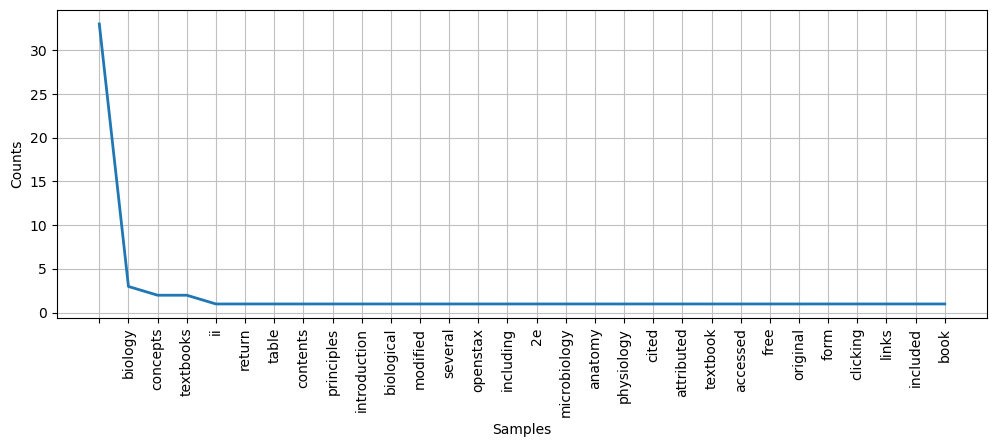

In [50]:
# Plot the figure
plt.figure(figsize=(12, 4))
fdist = nltk.FreqDist(cleaned_top_sent_words)
fdist.plot(30, cumulative=False)
plt.show()

### Named Entity Recognition and spaCy

In [51]:
# Load the English language model from spaCy
nlp = spacy.load('en_core_web_sm')

In [52]:
# Create a dococument object
document = nlp(text)

In [53]:
# Define a function to display named entities along with their corresponding entity labels and explanations 
def show_ents(document):
    if document.ents:
        for ent in document.ents:
            print(ent.text + '-' + str(spacy.explain(ent.label_)))
show_ents(document)

Concepts of Biology-Companies, agencies, institutions, etc.
4.0-Numerals that do not fall under another type
Concepts of Biology OpenStax-Companies, agencies, institutions, etc.
Samantha Fowler-People, including fictional
Rebecca Roush-People, including fictional
James Wise-People, including fictional
Concepts of Biology-People, including fictional
25, 2013-Absolute or relative dates or periods
Houston-Countries, cities, states
Texas-Countries, cities, states
Jan 12-Absolute or relative dates or periods
Ope nStax-People, including fictional
4.0-Numerals that do not fall under another type
CNX-Companies, agencies, institutions, etc.
OpenStax CNX-Companies, agencies, institutions, etc.
the Creative Commons-Companies, agencies, institutions, etc.
Rice 
University-Companies, agencies, institutions, etc.
Mary Ann Clark-People, including fictional
Matthew Douglas-People, including fictional
Jung Choi-People, including fictional
2e-Numerals that do not fall under another type
Publication-Comp

In [54]:
# Visualize named entities in the text document using spaCy's displacy module
displacy.render(document, style='ent', jupyter=True)

### WordCloud

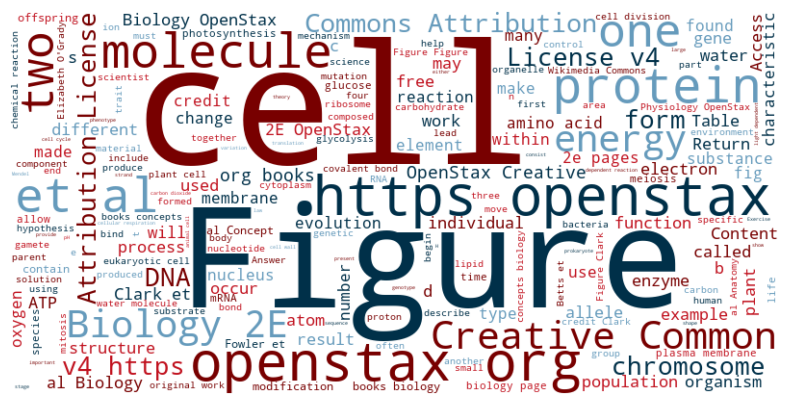

In [55]:
# Generate a word cloud from text (pdf file)
# Define a custom color function that returns four specific colors
def color_func(word, font_size, position, orientation, random_state=20, **kwargs):
    colors = ["#780000", "#c1121f", "#003049", "#669bbc"]
    
    # Generate a random color from the list
    return colors[np.random.randint(0, len(colors))]  

# Generate a word cloud from text (pdf file) with custom colors
wordcloud = WordCloud(width=800, height=400, background_color="white", 
                      color_func=color_func, random_state=55).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [56]:
# Save the word cloud image
wordcloud.to_file('wordcloud.png')

### word2vec - find similar words

In [57]:
# Tokenize the preprocessed text into words
tokenized_text = [word_tokenize(sentence) for sentence in text.split('\n')]

# Remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# filter a list of tokenized sentences by converting the words to lowercase and removing those that are present
# in the specified stop_words and punctuation
filtered_tokenized_text = [
    [word.lower() for word in sentence if word.lower() not in stop_words and word.lower() not in punctuation]
    for sentence in tokenized_text
]

# Initialize and train a Word2Vec model using the Word2Vec class from Gensim
# sentences: The tokenized text, vector_size: Dimensionality of the word vectors, 
# window: Maximum distance between the current and predicted word within a sentence
# min_count: Ignores all words with a total frequency lower than this.
# workers: Number of CPU cores to use when training the model.
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Find the top number of most similar words to the given target word 
similar_words = word2vec_model.wv.most_similar('cell', topn=10)

# Print similar words and its similarity score
print("Similar words to 'cell':")
for word, score in similar_words:
    print(f"{word}: {score}")


Similar words to 'cell':
DNA: 0.9921436309814453
population: 0.9920714497566223
atom: 0.9913305044174194
protein: 0.9903072118759155
is: 0.9892070889472961
form: 0.9891402125358582
an: 0.9890061616897583
two: 0.9887660145759583
molecules: 0.9879426956176758
water: 0.9876450300216675


### Visualize Word2Vec embeddings using umap from Gensim library

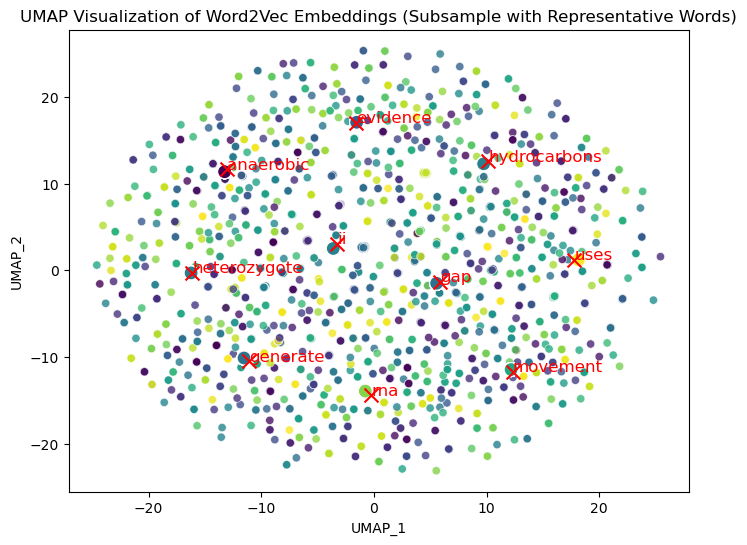

In [58]:
# Preprocess text: tokenize, lowercase, remove punctuation and stopwords
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Apply preprocessing to each sentence
tokenized_text = [preprocess_text(sentence) for sentence in text.split('\n')]

# Word2Vec model
word2vec_model = Word2Vec(
    sentences=tokenized_text,
    vector_size=200,  # vector size
    window=15,        # window size
    min_count=5,      # min_count word count
    workers=4,
    sg=1,             # Skip-Gram
    negative=10,      # negative sampling
    epochs=20         # epochs
)

# Get embeddings and corresponding words
# This loop iterates through each word in the preprocessed text, checks if the word has an embedding 
# in the Word2Vec model, and if so, adds the embedding to the embeddings and filtered_labels list.
embeddings = []
filtered_labels = []

for sentence_tokens in tokenized_text:
    for word in sentence_tokens:
        if word in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[word])
            filtered_labels.append(word)

# Encode words using LabelEncoder (convert categorical labels (words) into numerical inputs)
# Create NumPy array containing the encoded integer values corresponding to each unique word in filtered_labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(filtered_labels)

# Create a DataFrame to organize and store the embeddings and labels for further analysis
df = pd.DataFrame(embeddings, columns=[f'dim_{i}' for i in range(word2vec_model.vector_size)])
df['label'] = encoded_labels

# Apply UMAP for dimensionality reduction
# n_components=2 means two-dimensional space
# min_dist is the minimum distance between points in the reduced space to help prevent overcrowding
umap_model = umap.UMAP(n_components=2, min_dist=0.1)

# Apply UMAP to transform the data into a lower-dimensional space
umap_result = umap_model.fit_transform(df.drop('label', axis=1))

# Create a DataFrame with UMAP results
umap_df = pd.DataFrame(umap_result, columns=['UMAP_1', 'UMAP_2'])
umap_df['label'] = df['label']

# Subsample 2000 points for visualization
umap_df_sample = umap_df.sample(n=2000, random_state=42)

# Define the number of clusters for KMeans clustering
num_clusters = 10

# Use KMeans clustering algorithm to cluster the data points in the UMAP into a specified number of clusters 
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)

# Fit k-means clustering 
umap_df['cluster'] = kmeans.fit_predict(umap_df[['UMAP_1', 'UMAP_2']])

# Find centroids of each cluster
cluster_centroids = umap_df.groupby('cluster').mean()[['UMAP_1', 'UMAP_2']]

# Find the nearest word to each centroid
representative_words = []
for idx, centroid in cluster_centroids.iterrows():
    # Find the nearest point in the original UMAP DataFrame
    nearest_point_idx = ((umap_df[['UMAP_1', 'UMAP_2']] - centroid)**2).sum(axis=1).idxmin()
    
    # Get the corresponding word from the original DataFrame
    representative_word = label_encoder.inverse_transform([umap_df.loc[nearest_point_idx, 'label']])[0]
    
    # Add the representative word to the list
    representative_words.append(representative_word)

# Create umap_df_subset DataFrame for plotting
umap_df_subset = umap_df[umap_df['label'].isin(label_encoder.transform(representative_words))]

# Plot the UMAP visualization with representative words
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UMAP_1', y='UMAP_2', hue='label', palette='viridis', data=umap_df_sample, legend='full', alpha=0.8)
sns.scatterplot(x='UMAP_1', y='UMAP_2', hue='label', palette='viridis', data=umap_df_subset, legend=False, alpha=1, marker='o', s=100)
plt.scatter(cluster_centroids['UMAP_1'], cluster_centroids['UMAP_2'], marker='x', color='red', s=100, label='Cluster Centroids')
for idx, word in enumerate(representative_words):
    plt.annotate(word, (cluster_centroids.iloc[idx]['UMAP_1'], cluster_centroids.iloc[idx]['UMAP_2']), color='red', fontsize=12)

plt.title('UMAP Visualization of Word2Vec Embeddings (Subsample with Representative Words)')
plt.legend().set_visible(False)

# Save the UMAP graph as an image
plt.savefig('umap_graph.png')

plt.show()
